<a href="https://colab.research.google.com/github/joethecoolest/Bai_Tap_AI/blob/main/CNN_10_fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install bing-image-downloader

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN_10_Fruit_Regconize/train_set1',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN_10_Fruit_Regconize/test_set1',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 586 images belonging to 6 classes.
Found 245 images belonging to 6 classes.


In [ ]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN_10_Fruit_Regconize/train_set1'
                                            ,target_size=(150,150)
                                            ,batch_size=32
                                            ,class_mode='categorical')

Found 586 images belonging to 6 classes.


In [ ]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN_10_Fruit_Regconize/test_set1'
                                            ,target_size=(150,150)
                                            ,batch_size=32
                                            ,class_mode='categorical')

Found 245 images belonging to 6 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 43808)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [ ]:
training_data.class_indices

{'chuối': 0, 'dâu tây': 1, 'dứa': 2, 'khe': 3, 'mangcut': 4, 'xoai': 5}

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
callbacks=[EarlyStopping(monitor='val_loss',patience=20)]
history=model.fit(training_data,
                  steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=100,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/100
19/19 [==============================] - 360s 19s/step - loss: 2.9445 - accuracy: 0.4317 - val_loss: 1.4185 - val_accuracy: 0.4816
Epoch 2/100
19/19 [==============================] - 62s 3s/step - loss: 0.8026 - accuracy: 0.6877 - val_loss: 0.7646 - val_accuracy: 0.7837
Epoch 3/100
19/19 [==============================] - 60s 3s/step - loss: 0.5820 - accuracy: 0.7935 - val_loss: 0.9651 - val_accuracy: 0.6449
Epoch 4/100
19/19 [==============================] - 60s 3s/step - loss: 0.4550 - accuracy: 0.8345 - val_loss: 0.5897 - val_accuracy: 0.8163
Epoch 5/100
19/19 [==============================] - 62s 3s/step - loss: 0.3198 - accuracy: 0.8823 - val_loss: 0.5386 - val_accuracy: 0.8408
Epoch 6/100
19/19 [==============================] - 60s 3s/step - loss: 0.2527 - accuracy: 0.9061 - val_loss: 0.6936 - val_accuracy: 0.8286
Epoch 7/100
19/19 [==============================] - 60s 3s/step - loss: 0.2184 - accuracy: 0.9352 - val_loss: 0.6179 - val_accuracy: 0.8041
Epoch 8/100

Sai số kiểm tra là:  1.0963413715362549
Độ chính xác kiểm tra là:  0.8612244725227356


<function matplotlib.pyplot.show>

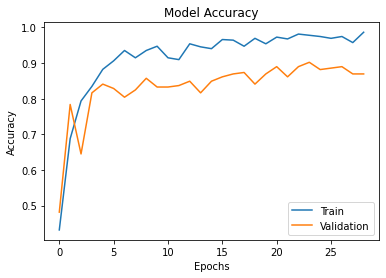

In [ ]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/CNN_10_fruit.h5")

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/CNN_10_fruit.h5')

banana_chuoi


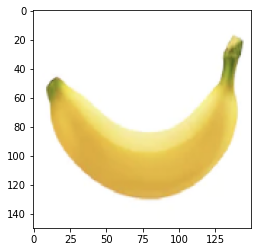

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/CNN_10_Fruit_Regconize/exam_set1/banana.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='banana_chuoi'
if round(result[0][1])==1:
  prediction='strawberry_dau'
print(prediction)

strawberry_dau


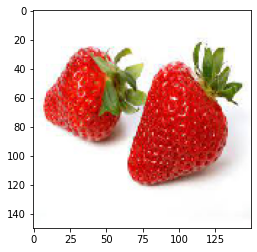

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/CNN_10_Fruit_Regconize/exam_set1/download.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='banana_chuoi'
if round(result[0][1])==1:
  prediction='strawberry_dau'
print(prediction)

strawberry_dau


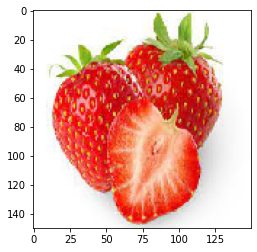

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/CNN_10_Fruit_Regconize/exam_set1/strawberry.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='banana_chuoi'
if round(result[0][1])==1:
  prediction='strawberry_dau'
print(prediction)

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/CNN_10_fruit.h5")

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/CNN_4_loai_banh.h5')
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator